# DSCI 571 lab 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# For tokenization
import nltk
# For converting words into frequency counts
from sklearn.feature_extraction.text import CountVectorizer

## Instructions
rubric={mechanics:2}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).


## Introduction 
The learning objectives of this lab are:

1. to learn how to use ensemble methods with `scikit-learn`
2. to learn linear classification methods with `scikit-learn`

## Exercise 0: Data and preprocessing
rubric={reasoning:2}

Similar to lab3, for most of the exercises in this lab, unless specified otherwise, we will again be focusing on text classification task called sentiment analysis, which is a problem of assigning positive or negative label to a text based on the sentiment or attitude expressed in it.

You will again be using [IMDB movie review data set](https://www.kaggle.com/utathya/imdb-review-dataset) but with a small change; you will use a subset of the IMDB reviews dataset with only 5,000 examples (compared to 50,000 examples in the original data). Note that more data is usually better but you will work with a subset in this lab for speed. 

The starter code for reading the CSV, taking a subset, and feature extraction (assuming that the imdb CSV with the name `imdb_master.csv` is available in the present directory) is given below. 

Read the code carefully and add documentation to this code by filling in the `# YOUR COMMENT` stubs. 

Please _do not commit any data files to GitHub_ as it is very large. 

### Begin starter code

In [2]:
# Read IMDB movie reviews into a pandas DataFrame
imdb_df = pd.read_csv('imdb_master.csv', encoding = "ISO-8859-1")
imdb_df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [3]:
# Only keep the reviews with pos and neg labels
imdb_df = imdb_df[imdb_df['label'].str.startswith(('pos','neg'))]

# Sample 5000 rows from the dataframe. 
imdb_df_subset = imdb_df.sample(n = 5000)

# Convert a collection of text documents to a matrix of token presence or absence. 
# We are using only 5000 words, English stopwords, and tokenization is done using
# nltk, which is a popular text processing library.
movie_vec = CountVectorizer(max_features=5000, 
                            tokenizer=nltk.word_tokenize, 
                            stop_words='english', 
                            binary = True)
# Create X and y
X_imdb = movie_vec.fit_transform(imdb_df_subset['review'])
y_imdb = imdb_df_subset.label

### End starter code

## Exercise 1. Random Forests

### 1(a) Train a random forest classifier and compare it with decision trees
rubric={accuracy:2,reasoning:2}

1. Split `X_imdb` into train (80%) and test (20%). 
2. Train a decision tree classifier on the train portion. 
3. Train a [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) on the train portion.
4. Score both classifier on the test portion and compare the results. 

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_imdb, 
                                                    y_imdb, 
                                                    test_size = 0.20, 
                                                    random_state = 12)

In [6]:
random_forest = RandomForestClassifier(n_estimators = 100)
%timeit random_forest.fit(X_train, y_train);

1 loop, best of 3: 2.47 s per loop


In [7]:
decision_tree = tree.DecisionTreeClassifier()
%timeit decision_tree.fit(X_train, y_train);

1 loop, best of 3: 874 ms per loop


In [8]:
random_forest.score(X_test, y_test)

0.831

In [9]:
decision_tree.score(X_test, y_test)

0.695

**Discussion**

For this dataset, the accuracy of the random forest classifier is clearly better than the decision tree classifier. That said, the time required to `fit` a model is higher for random forests compared to the decision tree model, especially for larger values of `n_estimators`, which is intuitive given that random forests do more work than a decision tree.  

### 1(b) Hyperparameters
rubric={accuracy:4,reasoning:2}

1. Pick two choices of the random forest hyperparameters. You can choose any two hyperparameter sets of your choice, aside from the default. 
2. Report the training/test accuracy in each case. 
3. In each case, discuss whether you think there is any underfitting or overfitting.

In [10]:
n_estimators_dict = {'n_estimators':[], 'train_score':[], 'test_score':[]}

for n_est in range(1, 100, 5):
    random_forest = RandomForestClassifier(n_estimators = n_est)
    random_forest.fit(X_train, y_train)
    
    train_score = random_forest.score(X_train, y_train)        
    test_score = random_forest.score(X_test, y_test)    

    n_estimators_dict['n_estimators'].append(n_est)    
    n_estimators_dict['train_score'].append(train_score)
    n_estimators_dict['test_score'].append(test_score)
n_estimators_df = pd.DataFrame(n_estimators_dict)
n_estimators_df        

,n_estimators,test_score,train_score
0,1,0.641,0.86300
1,6,0.722,0.97175
2,11,0.773,0.99600
3,16,0.782,0.99800
4,21,0.791,0.99975
5,26,0.794,1.00000
6,31,0.816,1.00000
7,36,0.799,1.00000
8,41,0.826,1.00000
9,46,0.815,0.99975


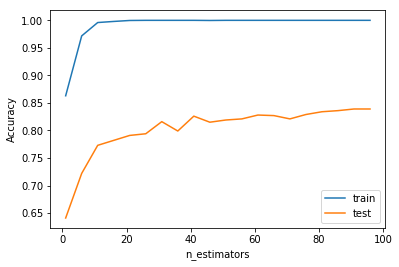

In [11]:
plt.plot(n_estimators_dict['n_estimators'], n_estimators_dict['train_score'], label = 'train')
plt.plot(n_estimators_dict['n_estimators'], n_estimators_dict['test_score'], label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** Discussion **

For the `n_estimators` hyperparameter, the training accuracy reaches to 1.0 for n_estimators > 31. The test accuracy more or less starts plateauing at this point.

In [12]:
max_depth_dict = {'depth':[], 'train_score':[], 'test_score':[]}

for depth in range(1, 40, 2):
    random_forest = RandomForestClassifier(n_estimators = 20, max_depth = depth)
    random_forest.fit(X_train, y_train)
    
    train_score = random_forest.score(X_train, y_train)        
    test_score = random_forest.score(X_test, y_test)    

    max_depth_dict['depth'].append(depth)        
    max_depth_dict['train_score'].append(train_score)
    max_depth_dict['test_score'].append(test_score)    
    
max_depth_df = pd.DataFrame(max_depth_dict)
max_depth_df

,depth,test_score,train_score
0,1,0.613,0.62325
1,3,0.722,0.75875
2,5,0.759,0.79675
3,7,0.772,0.83325
4,9,0.795,0.86650
5,11,0.792,0.86900
6,13,0.778,0.88150
7,15,0.811,0.90825
8,17,0.772,0.91400
9,19,0.796,0.92700


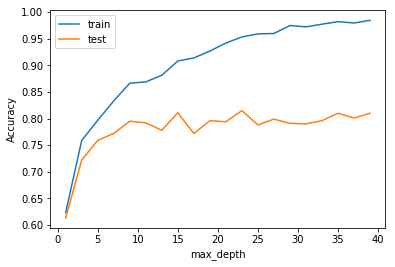

In [13]:
plt.plot(max_depth_dict['depth'], max_depth_dict['train_score'], label = 'train')
plt.plot(max_depth_dict['depth'], max_depth_dict['test_score'], label = 'test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** Discussion **

For the `max_depth` hyperparameter, the training accuracy keeps increasing but the test accuracy plateaus after max_depth = 11 indicating overfitting. 

### 1(c)
rubric={reasoning:2}

Give one advantage and one disadvantage of random forests compared to classification models that we learned previously (e.g., $k$-NN, decision trees). 

**Advantages of random forests**
1. Powerful and a great off-the-shelf classifier. 
2. Predictions are much faster compared to $k$-NN 

**Disdvantages of random forests**
1. Slow training, as we fit multiple estimators but can be easily parallelized.

### (optional) 1(d)
rubric={reasoning:1}

How much randomness is there really in **random** forests? Do the results change drastically if you re-fit a forest using the same data and same hyperparameters (try it)? If it does, is that worrying?

In [14]:
train_accuracies = []
test_accuracies = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_imdb, y_imdb, test_size = 0.20)
    random_forest = RandomForestClassifier(n_estimators=5)
    random_forest.fit(X_train, y_train)
    train_accuracies.append(random_forest.score(X_train, y_train))    
    test_accuracies.append(random_forest.score(X_test, y_test))

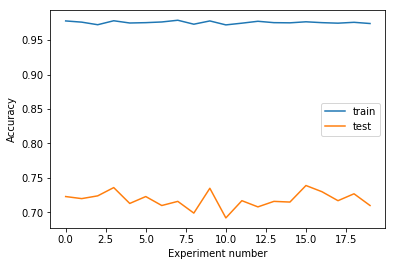

In [15]:
plt.plot(range(20), train_accuracies, label = 'train')
plt.plot(range(20), test_accuracies, label = 'test')
plt.xlabel('Experiment number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## (optional) Exercise 2: Gradient Tree Boosting

Boosting is an ensemble technique to combine a set of weak learners into a strong learner. In this exercise you will play with the [Gradient Tree Boosting classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). 

### (optional) 2(a) Compare gradient tree boosting with random forests and decision trees
rubric={reasoning:1}

1. Pick a dataset of your choice or create some fake data for binary or multiclass classification. (If you have trouble finding a dataset, you are welcome to use the following dataset from sklearn.)
2. Split the dataset into train (80%) and test (20%). 
2. Train decision tree and random forest classifiers on the train portion. Note the accuracies on the test portion. 
3. Now train the [Gradient Tree Boosting classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) and note the training and test accuracies. You are welcome to play with the hyperparameters. 
4. Do you get better accuracies with boosting? Discuss your results.

### Begin starter code

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
from sklearn.datasets import make_hastie_10_2

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

### End starter code

In [18]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test, y_test)

0.7327

In [19]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

0.8628

In [20]:
gbs = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
gbs.fit(X_train, y_train)
gbs.score(X_test, y_test)                 

0.913

### (optional) 2(b) Tree-based regressors
rubric={reasoning:1}

All these tree-based models can also be used for regression. In this exercise you will compare tree-based regressors using [sklearn's boston house-prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).

1. Load the dataset into X and y and split it into train (80%) and test (20%).
2. Train three tree-based regressors on the train portion: [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor), with the same hyperparameters.
3. Compare the results on the test portion and note your observations. 

In [21]:
from sklearn.datasets import load_boston
from sklearn.utils import shuffle

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [23]:
boston = load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [24]:
params = {'n_estimators': 100, 'max_depth': 4}
decision_tree_model = DecisionTreeRegressor(max_depth = 4)
random_forest_model = RandomForestRegressor(**params)
gradient_boosting_model = GradientBoostingRegressor(**params)

In [25]:
decision_tree_model.fit(X_train, y_train);
random_forest_model.fit(X_train, y_train);
gradient_boosting_model.fit(X_train, y_train);

In [26]:
print('decision tree regression: ', decision_tree_model.score(X_test, y_test))
print('random forest regression: ', random_forest_model.score(X_test, y_test))
print('gradient boosting regression: ', gradient_boosting_model.score(X_test, y_test))

decision tree regression:  0.7252342944934349
random forest regression:  0.8281425785121896
gradient boosting regression:  0.8671167079162282


## Exercise 3: Support Vector Machines (SVM)

In this exercise, you will again use `X_imdb` and `y_imdb` from the IMDB subset above. Divide this subset of IMDB reviews dataset into train (80%) and test (20%) portions. You will use [scikit-learn implementation of an SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). 

In [27]:
from sklearn.svm import SVC

### 3(a): Kernels in SVM classification
rubric={accuracy:2,quality:2,reasoning:2}

1. Try three different kernels: linear, polynomial (with `gamma=0.001`), and RBF. 
2. Report the train and test accuracies in each case.
3. Briefly note your observations. Why do you think `scikit-learn` uses an RBF kernel by default? 

In [28]:
X = X_imdb
y = y_imdb

In [29]:
def get_train_test_accuracies(X, y, model):
    """
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.20, 
                                                        random_state = 12)    
    model.fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_test, y_test)    

In [30]:
kernel_experiments = {'kernel':[], 'train_accuracy':[], 'test_accuracy':[]}
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel = kernel, degree=2, gamma='scale')        
    train_accuracy, test_accuracy = get_train_test_accuracies(X, y, model)
    kernel_experiments['kernel'].append(kernel)
    kernel_experiments['train_accuracy'].append(train_accuracy)
    kernel_experiments['test_accuracy'].append(test_accuracy)

In [31]:
kernel_df = pd.DataFrame(kernel_experiments)
kernel_df

,kernel,test_accuracy,train_accuracy
0,linear,0.830,1.0000
1,poly,0.494,0.5015
2,rbf,0.837,0.8800


**Discussion**

1. SVC model with a linear kernel is overfitting, as the trainng accuracy is 1.0, whereas test accuracy is 0.81
2. SVC model with a polynomial (degree = 2) kernel is underfitting; the training accuracy is just 0.50, which is close to random classification. 
3. SVC model with a rbf kernel seems to give the best test accuracy for this dataset, which is indicative of why `scikit-learn` might be using this kernel as default. An SVM model with an RBF kernel is an effective off-the-shelf model. 

### 3(b): `gamma` and `C` hyperparameters
rubric={reasoning:1}

1. Play around with the `C` and `gamma` hyperparameters. Try 5 different values for each of these parameters. 
2. What effects do they have? Can you relate them to the fundamental tradeoff of ML?

In [32]:
gamma_experiments = {}
gammas = [10.0**(i-3) for i in range(5)]

for gamma in gammas:
    model = SVC(gamma=gamma)        
    train_accuracy, test_accuracy = get_train_test_accuracies(X, y, model)    
    gamma_experiments[gamma] = {'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy}

In [33]:
gamma_df = pd.DataFrame(gamma_experiments)
gamma_df

,0.001,0.01,0.1,1.0,10.0
test_accuracy,0.8250,0.85500,0.60700,0.494,0.494
train_accuracy,0.8555,0.96875,0.99975,1.000,1.000


In [34]:
C_experiments = {}
C = [10.0**(i-1) for i in range(5)]

for c in C:
    model = SVC(C = c, gamma='scale')        
    train_accuracy, test_accuracy = get_train_test_accuracies(X, y, model)
    C_experiments[c] = {'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy}        

In [35]:
C_df = pd.DataFrame(C_experiments)
C_df

,0.1,1.0,10.0,100.0,1000.0
test_accuracy,0.59100,0.837,0.8540,0.83500,0.833
train_accuracy,0.59975,0.880,0.9725,0.99975,1.000


** Discussion **
1. Increasing the `gamma` value leads to overfitting; training accuracy reaches 1.0 but the test accuracy drops drastrically. 
2. Increasing the `C` value also leads to overfitting. However the test accuracy drop is not as drastic as 1. 

### 3(c) Multiclass classification with SVM
rubric={accuracy:2,reasoning:2}

Supervised machine learning algorithms such as random forests or decision trees can discern between more than two classes by default but support vector machines are inherently binary classifiers. That said, they can be used to multiclass classification. There are two popular methods used to apply binary classifiers to multiclass problem: one-vs-rest (ovr) or one-vs-all (ova) and one-vs-one (ovo). 
[Here](https://scikit-learn.org/stable/modules/multiclass.html) you will find summary of how `scikit-learn` handles multi-class classification for different classifiers. `SVC` multiclass mode is implemented using one-vs-one scheme whereas `LinearSVC` uses one-vs-rest scheme. That said, we can use the [`OneVsRestClassifier wrapper`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) to implement one-vs-rest with `SVC`. 

A starter code to create synthetic data for multi-class classification is provided below. 

1. Split `X` and `y` into train (80%) and test (20%).
2. Train SVC with its default `ovo` multiclass classification strategy. Note train and test accuracies. Use `OneVsOneClassifier` wrapper (i.e., by creating `model = OneVsOneClassifier(SVC())`) and check whether you get more or less the same accuracies.   
3. Train SVC with with `ovr` multiclass classification strategy by using the `OneVsRestClassifier` wrapper. Note train and test accuracies.  
4. Note your observations. (You are welcome to play around with number of classes in the synthetic data.)

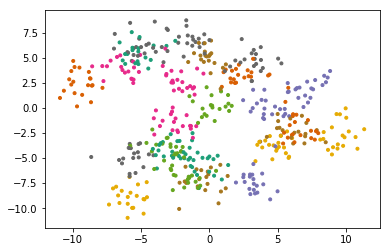

In [36]:
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# generate blobs with fixed random generator
X, y = make_blobs(n_samples=500, centers=25, random_state=300)

plt.scatter(*X.T, c=y, marker='.', cmap='Dark2');

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [38]:
model = SVC(gamma = 'scale')
%timeit model.fit(X_train, y_train);
print('OVO default method')
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

100 loops, best of 3: 6.44 ms per loop
OVO default method
0.7625
0.69


In [39]:
model = OneVsOneClassifier(SVC(gamma = 'scale'))
% timeit model.fit(X_train, y_train);
print('With OVO wrapper')
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1 loop, best of 3: 193 ms per loop
With OVO wrapper
0.765
0.68


In [40]:
model = OneVsRestClassifier(SVC(gamma='scale'))
% timeit model.fit(X_train, y_train)
print('With OVR method')
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

10 loops, best of 3: 32.7 ms per loop
With OVR method
0.725
0.69


**Discussion**

1. The results of the default OVO method and the wrapper OVO method are more or less the same. 
2. The wrapper OVR is a bit faster compared to the wrapper OVO. 


### (optional) 3(d): Support vectors
rubric={reasoning:1}

In this exercise, you will investigate the notion of support vectors. 

Again split the IMDB subset into train and test. Now based on the results in 3a, choose a model with reasonable hyperparameter values and train an SVM on the train split. 

1. Use `n_support_` attribute of the model (see the Attributes subsection [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) to get the number of support vectors. 
2. You will see that the number of support vectors is smaller compared to the number of training examples. This is the appeal of the SVM, as a small number of support vectors causes it to run very fast with kernels. 
3. Now, your task is to do a sanity check on the above. One definition of a support vector is that if that example were removed, the decision boundary would change, whereas if a non-support-vector is removed nothing is supposed to change. We can inspect the decision boundary by printing out the learned parameters of the SVM. So your task is to remove one support vector and show that the parameters change, and then remove one non-support-vector and show that the parameters stay the same. To check whether two numpy arrays are equal, you may use `numpy.array_equal`. To delete an element from a numpy array you can use `numpy.delete`. 

In case this is helpful (if not, pls ignore): note that the parameters are the same thing as the decision boundary; they are the numerical representation of the boundary, which is a hyperplane in $d-1$ dimensions. That's why checking whether the parameters change is the same as checking whether the decision boundary changes.

(Note: I guess it would be better to check this property for all $N$ training examples but I think it's good enough to just pick one SV and one non-SV based on the list of SV indices given above. Doing it for all shouldn't be hard actually -- it's just an extra `for` loop.)

In [33]:
# Split X_imdb into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_imdb, y_imdb, test_size=0.2, random_state=4)

# Fit a linear SVM model
linear_svm = SVC(kernel="linear", C=1e6)
linear_svm.fit(X_train, y_train)

# Get the number of training examples
n = X_train.shape[0]

In [34]:
sv = linear_svm.n_support_
print("There are %d support vectors out of %d training examples" % (linear_svm.support_.size, n))

There are 1730 support vectors out of 4000 training examples


In [35]:
not_sv = list(set(range(n)) - set(sv))

In [36]:
# Remove a support vector 
X_sv = np.delete(X_train.todense(), sv[0], 0)
y_sv = np.delete(y_train.values, sv[0])

# Remove a non-support vector
X_not_sv = np.delete(X_train.todense(), not_sv[0], 0)
y_not_sv = np.delete(y_train.values, not_sv[0])

In [37]:
# Create a SVC object after removing a support vector. 
sv_removed_SVM = SVC(kernel="linear", C=1e6)
sv_removed_SVM.fit(X_sv, y_sv);
# Fit a model with new training data after removing a non-support vector
non_sv_removed_SVM = SVC(kernel="linear", C=1e6)
non_sv_removed_SVM.fit(X_not_sv, y_not_sv);

In [39]:
print("The learned weight of the original SVM model: ")
print(linear_svm.coef_.todense())
print
print("The learned weights after removing a support vector: ")
print(sv_removed_SVM.coef_)
print
print("The learned weights after removing a non-support vector: ")
print(non_sv_removed_SVM.coef_)

assert np.array_equal(linear_svm.coef_.todense(), non_sv_removed_SVM.coef_) == True, "Expected to be equal"
assert np.array_equal(linear_svm.coef_.todense(), sv_removed_SVM.coef_) == False, "Expected to be unequal"

The learned weight of the original SVM model: 
[[ 0.10756356  0.04747278 -0.23141232 ... -0.01522512  0.17901889
  -0.06888064]]
The learned weights after removing a support vector: 
[[ 0.10751284  0.04738689 -0.23139165 ... -0.01522574  0.17904124
  -0.06890922]]
The learned weights after removing a non-support vector: 
[[ 0.10756356  0.04747278 -0.23141232 ... -0.01522512  0.17901889
  -0.06888064]]


## Exercise 4: Logistic regression

### 4(a) Logistic regression model 
rubric={accuracy:2,reasoning:2}

In this exercise you will work with another linear model called _Logistic Regression_.

1. Split `X_imdb` into train (80%) and test (20%) splits.
2. Train [Logistic Regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on the train split. How do train and test accuracies compare to the support vector machine classifier in Exercise 3? 

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_imdb, 
                                                    y_imdb, 
                                                    test_size = 0.20)

In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train);
lr.score(X_test, y_test)

/Users/varada/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.823

### 4(b) Most informative words
rubric={reasoning:2}

1. For the logistic regression model in 4(a), find the 10 words that are most indicative of a positive review, and the 10 words that are most indicative of a negative review. The information you need is exposed by the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object. The vocabulary (mapping from feature indices to actual words) can be obtained using the following. 
2. Do these words make sense? 
3. Would it be hard to get most informative words for classifiers such as random forest classifier or $k$-NNs? 

In [52]:
vocab = movie_vec.get_feature_names()

In [53]:
## SOLUTION
inds = np.argsort(lr.coef_.flatten())
negative_words = [vocab[index] for index in inds[:10]]
positive_words = [vocab[index] for index in inds[-10:]]
print("Most negative words: %s" % ", ".join(negative_words))
print("Most positive words: %s" % ", ".join(positive_words))

Most negative words: worst, awful, lame, boring, waste, disappointment, worse, predictable, fails, poor
Most positive words: brilliant, enjoy, 8/10, hilarious, enjoyed, perfect, great, best, loved, excellent


## Exercise 5: Comparison of classifiers

In this exercise, you will compare different classifiers covered in this course:
  * decision trees
  * $k$-nearest neighbours  
  * naive Bayes  
  * random forests
  * SVM
  
For each classifier, use the scikit-learn implementation with default hyperparameters. 

### 5(a): Empirical comparison
rubric={code:4,quality:2,reasoning:3}

Perform the comparison on the following 3 data sets:
  * Spotify (used in lab 1 and 2)
  * Iris (used in lab 2)
  * Smaller subset of IMDB reviews with binary word features (used above)
  
Split all datasets into train and test split. Report the results for all 15 classifier-dataset combinations in a table  with 4 columns: Dataset, Classifier, Train Accuracy, and Test Accuracy. If a classifier is not applicable for certain dataset, specify that. 

Discuss your results:  
  - Are certain classifiers better for certain problems? Why? 
  - Would you change any of the hyperparameters? 
  - What about speed? What would you do for a huge data set? 
  - Any other considerations?
  
Note: because all sklearn classifiers use the name fit/predict structure, you can put your 5 classifiers in a list/dict and iterate over them with a loop (and likewise with the data). This will probably be easier writing 15 calls to fit and 15 to predict, etc. For example:

In [54]:
from sklearn.datasets import load_iris    
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.head()
feature_cols = ['sepal length (cm)', 
                'sepal width (cm)', 
                'petal length (cm)',
                'petal width (cm)']

X_iris = iris_df.loc[:, feature_cols]
y_iris = iris_df.target

In [55]:
spotify_df = pd.read_csv('spotify.csv')

feature_cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
                'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
                'speechiness', 'tempo', 'time_signature', 'valence']

X_spotify = spotify_df.loc[:, feature_cols]
y_spotify = spotify_df.target

In [56]:
results_dict = {
                'Dataset':[], 
                'Classifier':[],
                'Train Accuracy':[], 
                'Test Accuracy':[]
               }

models = {
    'knn'           : KNeighborsClassifier(),
    'decision tree' : DecisionTreeClassifier(),
    'random forest' : RandomForestClassifier(n_estimators=10),
    'SVM'           : SVC(gamma='auto'),
    'logistic regression': LogisticRegression()
}

datasets = {
            'imdb_subset'    : (X_imdb, y_imdb), 
            'spotify' : (X_spotify, y_spotify),
            'iris': (X_iris, y_iris)
            }                                                      

In [57]:
for (dataset_name, (X,y)) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = 0.20, 
                                                        random_state = 15)
    print('Working on dataset: ', dataset_name)
    for model_name, model in models.items():
        print("Fitting %s..." % model_name)
        model.fit(X_train, y_train);
        train_accuracy = model.score(X_train, y_train)
        test_accuracy = model.score(X_test, y_test)
        print("  training accuracy: %f" % train_accuracy)
        print("  test     accuracy: %f" % test_accuracy)
        results_dict['Dataset'].append(dataset_name)
        results_dict['Classifier'].append(model_name)
        results_dict['Train Accuracy'].append(train_accuracy)
        results_dict['Test Accuracy'].append(test_accuracy)  

Working on dataset:  imdb_subset
Fitting knn...
  training accuracy: 0.708750
  test     accuracy: 0.534000
Fitting decision tree...
  training accuracy: 1.000000
  test     accuracy: 0.664000
Fitting random forest...
  training accuracy: 0.991000
  test     accuracy: 0.750000
Fitting SVM...
  training accuracy: 0.708500
  test     accuracy: 0.658000
Fitting logistic regression...
  training accuracy: 0.999250
  test     accuracy: 0.838000
Working on dataset:  spotify
Fitting knn...
  training accuracy: 0.717917
  test     accuracy: 0.561881
Fitting decision tree...
  training accuracy: 0.998760
  test     accuracy: 0.705446
Fitting random forest...


/Users/varada/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


  training accuracy: 0.987601
  test     accuracy: 0.742574
Fitting SVM...
  training accuracy: 0.998760
  test     accuracy: 0.482673
Fitting logistic regression...
  training accuracy: 0.528828
  test     accuracy: 0.514851
Working on dataset:  iris
Fitting knn...
  training accuracy: 0.958333
  test     accuracy: 1.000000
Fitting decision tree...
  training accuracy: 1.000000
  test     accuracy: 0.933333
Fitting random forest...
  training accuracy: 0.991667
  test     accuracy: 1.000000
Fitting SVM...
  training accuracy: 0.983333
  test     accuracy: 1.000000
Fitting logistic regression...
  training accuracy: 0.941667
  test     accuracy: 0.933333


/Users/varada/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/varada/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/varada/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [58]:
results_df = pd.DataFrame(results_dict)
results_df

,Classifier,Dataset,Test Accuracy,Train Accuracy
0,knn,imdb_subset,0.534000,0.708750
1,decision tree,imdb_subset,0.664000,1.000000
2,random forest,imdb_subset,0.750000,0.991000
3,SVM,imdb_subset,0.658000,0.708500
4,logistic regression,imdb_subset,0.838000,0.999250
5,knn,spotify,0.561881,0.717917
6,decision tree,spotify,0.705446,0.998760
7,random forest,spotify,0.742574,0.987601
8,SVM,spotify,0.482673,0.998760
9,logistic regression,spotify,0.514851,0.528828


**Discussion**

1. The random forest classifier is consistently performing well on all three datasets.  
2. Logistic regression is the best performing classifier on the `imdb_subset` but it struggles on the `spotify` datset. We observe underfitting on this dataset; the train accuracy is only 0.528. SVM seems to be overfitting on the `spotify` dataset. 
3. It might be intersting to examine whether the same set of hyperparameter values work best for all three datasets.
4. In case of $k$-NNs it will be helpful if we scale the data before running the experiments. 
5. For the given datasets there was no big difference in the speed, as these datasets were not particularly large. 

### Exercise 5(b): Qualitative comparison of classifiers 
rubric={reasoning:4}

Fill in the following table with at least one entry per box.

Classifier |      Strengths | Weaknesses | Key hyperparameters |
-----------|      ------------|------------|---------------------|
$k$-NN              |            |            |                     |
decision tree       |            |            |                     |
random forest |            |            |                     |
SVM                 |            |            |                     |
logistic regression                 |            |            |                     |
naive Bayes         |            |            |                     |

For strengths and weaknesses, some things to consider are:
  * ease of use for multi-class classification
  * concerns about underfitting
  * concerns about overfitting
  * speed
  * scalability for large data sets
  * effectiveness when number of examples $\ll$ number of features
  * effectiveness when number of examples $\gg$ number of features
  * ability to represent uncertainty
  * etc.

### Answer

Classifier |      Strengths | Weaknesses | Key hyperparameters |
:-----------|      :------------|:------------|:---------------------|
$k$-NN | Minimal training; few moving parts. Runs somewhere between $\mathcal{O}(d \log n)$ and $\mathcal{O}(dn)$ | Sensitive to feature scaling, choice of $k$; distances "don't make sense" in high dimensions | `k` |
decision tree | Interpretable; validatable; $\mathcal{O}(\log n)$ prediction cost | Unstable with respect to data; prone to overfitting: sensitive to `max-depth`. | `max_depth` |
random forest | averaging improves accuracy, reduces overfitting | increase in bias due to best-splitting on random subsets. Black box model. | `n_estimators`, `max_depth`, `max_features` |
SVM | prediction cost $\propto$ # support vectors; strong predictive power *via* kernel trick  | Training is $\mathcal{\Omega}(dn^2)$ | `C`, `gamma` |
logistic regression | Outputs have a nice probabilistic interpretation; training time complexicity is $\mathcal{O}(dn)$ | doesn't work well when the decision boundaries are non-linear | `C` |
naive Bayes | Fast. Natural probabilistic interpretation. | Conditional independence often unrealistic. | `alpha` |